In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [56]:

data = fetch_california_housing(as_frame=True)
df = data.frame

X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
poly_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("model", LinearRegression())
])

poly_pipeline.fit(X_train, y_train)
y_pred_poly = poly_pipeline.predict(X_test)


In [37]:
lin_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

lin_pipeline.fit(X_train, y_train)
y_pred_lr = lin_pipeline.predict(X_test)


In [39]:
ridge = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Ridge())
])

ridge_params = {
    "model__alpha": [0.01, 0.1, 1, 10, 100]
}

ridge_cv = GridSearchCV(
    ridge, ridge_params, cv=5, scoring="r2"
)
ridge_cv.fit(X_train, y_train)

y_pred_ridge = ridge_cv.predict(X_test)


In [41]:
lasso = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Lasso(max_iter=5000))
])

lasso_params = {
    "model__alpha": [0.001, 0.01, 0.1, 1]
}

lasso_cv = GridSearchCV(
    lasso, lasso_params, cv=5, scoring="r2"
)
lasso_cv.fit(X_train, y_train)

y_pred_lasso = lasso_cv.predict(X_test)


In [48]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [46]:
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2


In [50]:
results = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Polynomial Regression (Degree 2)",
        "Ridge Regression",
        "Lasso Regression",
        "Random Forest"
    ],
    "MAE": [
        evaluate_model(y_test, y_pred_lr)[0],
        evaluate_model(y_test, y_pred_poly)[0],
        evaluate_model(y_test, y_pred_ridge)[0],
        evaluate_model(y_test, y_pred_lasso)[0],
        evaluate_model(y_test, y_pred_rf)[0],
    ],
    "RMSE": [
        evaluate_model(y_test, y_pred_lr)[1],
        evaluate_model(y_test, y_pred_poly)[1],
        evaluate_model(y_test, y_pred_ridge)[1],
        evaluate_model(y_test, y_pred_lasso)[1],
        evaluate_model(y_test, y_pred_rf)[1],
    ],
    "R2 Score": [
        evaluate_model(y_test, y_pred_lr)[2],
        evaluate_model(y_test, y_pred_poly)[2],
        evaluate_model(y_test, y_pred_ridge)[2],
        evaluate_model(y_test, y_pred_lasso)[2],
        evaluate_model(y_test, y_pred_rf)[2],
    ]
})

results


,Model,MAE,RMSE,R2 Score
0,Linear Regression,0.533200,0.745581,0.575788
1,Polynomial Regression (Degree 2),0.467001,0.681397,0.645682
2,Ridge Regression,0.533200,0.745581,0.575788
3,Lasso Regression,0.533145,0.744642,0.576856
4,Random Forest,0.326812,0.503960,0.806186


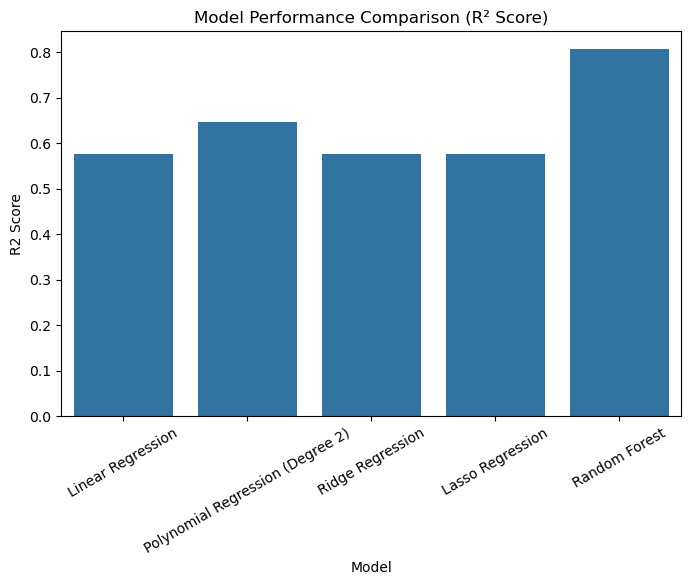

In [52]:
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="R2 Score", data=results)
plt.xticks(rotation=30)
plt.title("Model Performance Comparison (R² Score)")
plt.show()

